<center> <h1>Predicting wins in League of Legends</h1> </center>
<center> <h2>Machine Learning&Deep Learning Class</h2> </center>

https://www.kaggle.com/paololol/league-of-legends-ranked-matches

## Data Fields

### Below you can find the full list of variables present in the data set

#### Champs data set

- name - In-game name of the champion
- id - ID of the champion

#### Matches data set

- id - Match ID
- gameid - Game ID
- platformid - Platform ID
- queueid - Queue ID
- seasonid - Season ID (number of the following seazons: they are enumerated in LOL)
- duration - Duration of the match
- creation - ?
- version - Version of the game

#### Participants data set

- id - ID of the player
- matchid - Match ID
- player - ID of the player in the team (from 1 to 10; where 1-5 is one team and 5-10 is another)
- championid - ID of the champion which player took
- ss1 - Summoner spell on D (should be Flash)
- ss2 - Summoner spell on F (should not be Flash)
- role - SOLO for top and mid, NONE for jungle, DUO_CARRY or DUO_SUPPORT for botlane
- position - bot/jungle/top/mid

#### Stats1&2 data set

- id - ID of the player
- win - Binary variable 0 - lose, 1 - win
- item1 - ID of the first item bought
- item2 - ID of the second item bought
- item3 - ID of the third item bought
- item4 - ID of the fourth item bought
- item5 - ID of the fifth item bought
- item6 - ID of the sixth item bought
- trinket - ?
- kills - How many kills player aquired
- deaths - How many times player died
- assists - How many assists player aquired
- largestkillingspree - Largest killing-spree player aquired
- largestmultikill - Largest multi-kill player aquired
- killingsprees - How many killing-sprees player had
- longesttimespentliving - Longest time the player stayed alive
- doublekills - How many double kills player aquired
- triplekills - How many triple kills player aquired
- quadrakills - How many quadra kills player aquired
- pentakills - How many penta kills player aquired
- legendarykills - How many legendary kills player aquired
- totdmgdealt - How much total damage player dealt
- magicdmgdealt - How much magic damage player dealt
- physicaldmgdealt - How much physical damage player dealt
- truedmgdealt - How much true damage player dealt (surpassing armor)
- largestcrit - Largest critical damage player dealt
- totaldmgtochamp - Total damage dealt to other champions
- magicdmgtochamp - Magic damage dealt to other champions
- physdmgtochamp - Physical damage dealt to other champions
- truedmgtochamp - True damage dealt to other champions (surpassing armor)
- totheal - Total heal received
- totunitshealed - How many allies player healed
- dmgselfmit - ?
- dmgtoobj - Damage dealt to NPCs
- dmgtoturrets - Damage dealt to turrets
- visionscore - ?
- timecc - EMPTY
- totdmgtaken - Total damage received
- magicdmgtaken - Magic damage received
- physdmgtaken - Physical damage received
- truedmgtaken - True damage received (surpassing armor)
- goldearned - Amount of gold aquired in total
- goldspent - Amount of gold spent in total
- turretkills - How many turrets player last hit
- inhibkills - ?
- totminionskilled - How many minions player killed
- neutralminionskilled - ?
- ownjunglekills - How many jungle monsters on the player side of the map player killed
- enemyjunglekills - How many jungle monsters on the opposite side of the map player killed
- totcctimedealt - Total champion controll time player hold other players
- champlvl - Max level of the players champ in the match
- pinksbought - ?
- wardsbought - ?
- wardsplaced - ?
- wardskilled - ?
- firstblood - Binary variable: Does player was the first one to kill enemy champ in the match

#### Teamstats data set

Data set consisted mostly of binary variables, which give us info does team manage to do following things first
- matchid - Match ID
- teamid - Team ID (either 100 or 200)
- firstblood - First blood
- firsttower - First turret
- firstinhib - First inhibitor
- firstbaron - First baron killed
- dragonkills - First dragon killed
- firstharry - First herald killed
- towerkills - Tower destroyed total
- inhibkills - Inhibitors destroyed total
- baronkills - Baron killed total
- dragonkills - Dragon killed total
- harrykills - Herald killed total

#### Teambans data set

- matchid - Match ID
- teamid - Team ID
- championid - Champion ID
- banturn - Which champion was banned first/second/third - max 6

![](https://s.redefine.pl/file/o2/redefine/cp/kn/knmqd3dfmtog1sp4a3z8zvn9rer4gjgo.png)

## League of Legends: An Overview

League of Legends is a fast-paced, competitive online game that blends the speed and intensity of an RTS with RPG elements. Two teams of powerful champions, each with a unique design and playstyle, battle head-to-head across multiple battlefields and game modes. With an ever-expanding roster of champions, frequent updates and a thriving tournament scene, League of Legends offers endless replayability for players of every skill level.

## Aim of the project

The aim of this project is to use Neural Networks, SVM, and DeepLearning models to build classification model which will predict the outcome of the match - win or lose, basing on the given data.

The second aim is to compare these three different models and check which of them outperforms others

# Data preparation

## Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import gc
import re
import xgboost as xgb
import warnings
from random import shuffle
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn import neighbors
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from geopy.distance import great_circle
from sklearn.ensemble import RandomForestClassifier

In [30]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
warnings.filterwarnings("ignore")

In [31]:
# Center all plots by CSS
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
    }
.prompt 
    display:none;
}  
</style>
""")

## Data import

In [32]:
# Champions and ID
champions = pd.read_csv('data/champs.csv')

# Matches
matches = pd.read_csv('data/matches.csv')

# Player info
playersInfo = pd.read_csv('data/participants.csv')

# Stats
stat1 = pd.read_csv('data/stats1.csv', low_memory=False)
stat2 = pd.read_csv('data/stats2.csv', low_memory=False)
stats = stat1.append(stat2)

# Team - bans
bannedChampion = pd.read_csv('data/teambans.csv')

# Team - stats 
teamStats = pd.read_csv('data/teamstats.csv')

In [61]:
stats.describe()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood
count,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00
mean,944850.85,0.50,2429.24,2714.03,2657.57,2526.02,2143.62,1472.66,3336.69,5.79,5.81,8.32,2.67,1.33,1.34,630.66,0.54,0.07,0.01,0.00,0.00,113836.99,39027.54,69667.55,5141.14,241.95,17702.96,7750.30,8951.45,1000.56,5385.71,2.25,10826.29,4124.77,2146.03,13.84,0.00,23197.80,8121.81,14025.03,1050.20,11415.60,10370.91,0.91,0.18,120.98,19.94,12.22,7.72,429.17,14.22,0.98,11.48,1.78,0.10
std,532872.30,0.50,949.72,811.68,909.92,1036.76,1253.74,1333.67,192.95,4.60,3.27,5.92,2.53,0.76,1.26,311.07,0.93,0.30,0.11,0.04,0.00,1587345.92,49070.40,70700.56,1585672.28,418.54,11474.93,9264.52,9946.48,1635.84,5519.06,2.47,14663.11,6656.78,2953.73,17.40,0.00,11853.76,5149.31,7738.67,1272.25,4008.58,3869.36,1.21,0.46,83.96,31.63,20.32,13.00,660.76,3.12,1.41,7.55,2.23,0.30
min,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2147483648.00,0.00,0.00,-2147483648.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,643.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,484856.00,0.00,1402.00,2301.00,3006.00,2045.00,1033.00,0.00,3340.00,2.00,3.00,4.00,0.00,1.00,0.00,434.00,0.00,0.00,0.00,0.00,0.00,59653.00,4563.00,11530.00,442.00,0.00,9411.00,1335.00,1452.00,20.00,1734.00,1.00,0.00,0.00,0.00,0.00,0.00,15226.00,4516.00,8610.00,275.00,8864.00,7950.00,0.00,0.00,39.00,0.00,0.00,0.00,111.00,13.00,0.00,7.00,0.00,0.00
50%,945089.00,0.00,3047.00,3075.00,3065.00,3047.00,3031.00,1038.00,3340.00,5.00,6.00,7.00,2.00,1.00,1.00,590.00,0.00,0.00,0.00,0.00,0.00,109336.00,17823.00,42791.00,1976.00,0.00,15553.00,4166.00,4591.00,456.00,3778.00,1.00,6310.00,675.00,985.00,9.00,0.00,21522.00,7236.00,12789.00,657.00,11350.00,10275.00,0.00,0.00,125.00,4.00,2.00,1.00,251.00,15.00,1.00,10.00,1.00,0.00
75%,1406919.00,1.00,3142.00,3152.00,3117.00,3111.00,3102.00,3047.00,3363.00,8.00,8.00,12.00,4.00,2.00,2.00,792.00,1.00,0.00,0.00,0.00,0.00,157253.00,57935.00,113678.00,7080.00,427.00,23651.00,10940.00,14043.00,1203.00,7240.00,3.00,15631.00,5851.00,3228.00,22.00,0.00,29430.00,10721.00,18178.00,1352.00,13937.00,12750.00,1.00,0.00,186.00,22.00,13.00,10.00,518.00,16.00,1.00,14.00,3.00,0.00
max,1865604.00,1.00,3933.00,3933.00,3933.00,3933.00,3933.00,3933.00,3513.00,45.00,38.00,57.00,35.00,6.00,13.00,3038.00,12.00,7.00,4.00,2.00,1.00,1064761.00,789034.00,917986.00,713886.00,4876.00,152607.00,142469.00,123871.00,36143.00,102060.00,113.00,311225.00,84057.00,62488.00,179.00,0.00,165152.00,84580.00,90430.00,31648.00,40982.00,70255.00,10.00,7.00,673.00,299.00,176.00,181.00,25204.00,18.00,54.00,690.00,86.00,1.00


In [34]:
teamStats.describe()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
count,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00
mean,95052.75,150.00,0.49,0.49,0.46,0.32,0.48,0.23,5.75,1.04,0.41,1.44,0.23
std,53591.84,50.00,0.50,0.50,0.50,0.47,0.50,0.42,3.86,1.26,0.61,1.24,0.42
min,10.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48782.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
50%,95068.00,150.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,1.00,0.00,1.00,0.00
75%,141563.00,200.00,1.00,1.00,1.00,1.00,1.00,0.00,9.00,2.00,1.00,2.00,0.00
max,187588.00,200.00,1.00,1.00,1.00,1.00,1.00,1.00,16.00,13.00,5.00,7.00,2.00


In [35]:
bannedChampion.describe()

,matchid,teamid,championid,banturn
count,1099185.00,1099185.00,1099185.00,1099185.00
mean,94857.70,150.00,150.60,3.50
std,53518.59,50.00,136.99,1.71
min,10.00,100.00,1.00,1.00
25%,48667.00,100.00,63.00,2.00
50%,94735.00,200.00,114.00,4.00
75%,141347.00,200.00,157.00,5.00
max,187588.00,200.00,498.00,10.00


In [36]:
playersInfo.describe()

,id,matchid,player,championid,ss1,ss2
count,1834520.00,1834520.00,1834520.00,1834520.00,1834520.00,1834520.00
mean,944851.38,94885.31,5.49,114.51,6.55,7.26
std,532872.03,53596.79,2.87,114.86,3.98,4.26
min,9.00,10.00,1.00,1.00,1.00,1.00
25%,484856.75,48627.75,3.00,40.00,4.00,4.00
50%,945090.50,94759.50,5.00,79.00,4.00,4.00
75%,1406918.25,141375.25,8.00,127.00,11.00,11.00
max,1865604.00,187588.00,10.00,498.00,21.00,21.00


In [37]:
matches.describe()

,id,gameid,queueid,seasonid,duration,creation
count,184069.00,184069.00,184069.00,184069.00,184069.00,184069.00
mean,95052.75,3094878866.53,404.11,7.86,1832.86,1491281473636.20
std,53591.91,318870411.83,82.02,0.69,509.74,13262760903.15
min,10.00,457600302.00,4.00,3.00,190.00,1400522420879.00
25%,48782.00,3164446215.00,420.00,8.00,1541.00,1493563729443.00
50%,95068.00,3177685152.00,420.00,8.00,1837.00,1494400559124.00
75%,141563.00,3186251615.00,420.00,8.00,2145.00,1494978982585.00
max,187588.00,3197656975.00,440.00,8.00,4991.00,1496908941036.00


Our data set consists of 6 smaller data sets, which we will have to combine somehow. In total our data set consists of 2 million records and 91 variables, which gives us 182 000 000 data points!!! Quite big data set...

As one could spot, data is filled well, there are not really many of useless columns, and missing data - so far so goood.

## Explanatory Data Analysis (EDA)

In this part we will perform some Data Engineering, Visualisations etc. to make our variables more efficient for future purposes

![](https://www.gre.ac.uk/__data/assets/image/0011/1191953/analysis-banner.jpg)

### Feature Engineering

First we will have to deal with this split in data. 
- We need to merge data about players performance into one collumn allong with champs,stats and matches data.
- Next we will do the same for teams. 
- Finally we will merge both of them together to create one big ultimate data set!

But, first things first - lets create Players Table which combines players stats, champions they used and information about matches they played in

### Players

In [38]:
# Merge player id with their stats
players = pd.merge(playersInfo, stats, on = ['id'], how = 'left', suffixes=('', '_y'))

# Add the champion name
players = pd.merge(players, champions, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))

# Add the match technical info
players = pd.merge(players, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))

# Add 1-5 players to team 1, 6-10 to team 2
players['team'] = players['player'].apply(lambda x: 1 if x <= 5 else 2)

#renaming champ collumn name
players.rename(columns={'name': 'champ_chosen'}, inplace=True)

In [39]:
players.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood,champ_chosen,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version,team
0,9,10,1,19,4,11,NONE,JUNGLE,0.00,3748.00,2003.00,3111.00,3053.00,1419.00,1042.00,3340.00,6.00,10.00,1.00,2.00,2.00,2.00,643.00,2.00,0.00,0.00,0.00,0.00,96980.00,25154.00,65433.00,6392.00,0.00,9101.00,3975.00,4237.00,888.00,15160.00,1.00,23998.00,1826.00,1170.00,14.00,0.00,41446.00,13270.00,24957.00,3218.00,10497.00,10275.00,0.00,0.00,42.00,69.00,42.00,27.00,610.00,13.00,0.00,0,10.00,0.00,0.00,Warwick,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.00,2301.00,3111.00,3190.00,3107.00,0.00,0.00,3364.00,0.00,2.00,12.00,0.00,0.00,0.00,1116.00,0.00,0.00,0.00,0.00,0.00,25995.00,17633.00,6295.00,2066.00,0.00,8478.00,6684.00,977.00,816.00,11707.00,5.00,9402.00,1943.00,1852.00,30.00,0.00,17769.00,7945.00,7688.00,2136.00,9496.00,7975.00,1.00,0.00,17.00,1.00,1.00,0.00,211.00,14.00,1.00,0,17.00,3.00,0.00,Nami,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.00,1055.00,3072.00,3006.00,3031.00,3046.00,1036.00,3340.00,7.00,8.00,5.00,5.00,2.00,1.00,584.00,2.00,0.00,0.00,0.00,0.00,171568.00,1725.00,169576.00,266.00,1042.00,14425.00,331.00,14070.00,24.00,2283.00,2.00,16612.00,5094.00,2128.00,26.00,0.00,25627.00,12538.00,11094.00,1993.00,13136.00,11775.00,0.00,0.00,205.00,3.00,1.00,2.00,182.00,14.00,1.00,0,13.00,5.00,0.00,Draven,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
3,12,10,4,114,12,4,SOLO,TOP,0.00,1029.00,3078.00,3156.00,1001.00,3053.00,0.00,3340.00,5.00,11.00,2.00,2.00,1.00,1.00,300.00,0.00,0.00,0.00,0.00,0.00,113721.00,989.00,109563.00,3168.00,455.00,15267.00,296.00,11802.00,3168.00,4252.00,1.00,27174.00,8263.00,8263.00,5.00,0.00,31705.00,10280.00,19506.00,1918.00,11006.00,10683.00,3.00,0.00,164.00,6.00,6.00,0.00,106.00,15.00,0.00,0,3.00,0.00,0.00,Fiora,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
4,13,10,5,112,4,3,SOLO,MID,0.00,3020.00,1058.00,3198.00,3102.00,1052.00,1026.00,3340.00,2.00,8.00,2.00,0.00,1.00,0.00,504.00,0.00,0.00,0.00,0.00,0.00,185302.00,166671.00,16867.00,1763.00,0.00,18229.00,17925.00,28.00,275.00,1525.00,1.00,14616.00,3801.00,1724.00,15.00,0.00,20585.00,6850.00,11119.00,2615.00,11439.00,10485.00,1.00,0.00,235.00,4.00,3.00,1.00,159.00,15.00,0.00,0,10.00,0.00,0.00,Viktor,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1


In [40]:
# Drop columns
columnsToDrop = ['id', 'championid', 'ss1', 'ss2', 'version','wardsbought', 'id_y', 'gameid','seasonid','platformid','creation','version','seasonid','queueid','platformid']
players.drop(columns = columnsToDrop, inplace = True, errors = 'ignore')

# Drop the 3 rows
players = players.dropna()

# Change floats to ints
for col in players.columns:
    if isinstance(players[col][1], float):
        players[col] = players[col].astype('int64')

# Remove cancelled matches
players = players.query("duration > 100")

# Trimming outliers
players.loc[players.kills > 20, 'players'] = 20
players.loc[players.deaths > 15, 'deaths'] = 15
players.loc[players.assists > 30, 'assists'] = 30

# Changing variables to binary
players.loc[players.doublekills > 1,'doublekills'] = 1
players.loc[players.triplekills > 1,'triplekills'] = 1
players.loc[players.quadrakills > 1,'quadrakills'] = 1
players.loc[players.pentakills > 1,'pentakills'] = 1
players.loc[players.legendarykills > 1,'legendarykills'] = 1

In [41]:
players.head(20)

,matchid,player,role,position,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood,champ_chosen,duration,team,players
0,10,1,NONE,JUNGLE,0,3748,2003,3111,3053,1419,1042,3340,6,10,1,2,2,2,643,1,0,0,0,0,96980,25154,65433,6392,0,9101,3975,4237,888,15160,1,23998,1826,1170,14,0,41446,13270,24957,3218,10497,10275,0,0,42,69,42,27,610,13,0,10,0,0,Warwick,1909,1,nan
1,10,2,DUO_SUPPORT,BOT,0,2301,3111,3190,3107,0,0,3364,0,2,12,0,0,0,1116,0,0,0,0,0,25995,17633,6295,2066,0,8478,6684,977,816,11707,5,9402,1943,1852,30,0,17769,7945,7688,2136,9496,7975,1,0,17,1,1,0,211,14,1,17,3,0,Nami,1909,1,nan
2,10,3,DUO_CARRY,BOT,0,1055,3072,3006,3031,3046,1036,3340,7,8,5,5,2,1,584,1,0,0,0,0,171568,1725,169576,266,1042,14425,331,14070,24,2283,2,16612,5094,2128,26,0,25627,12538,11094,1993,13136,11775,0,0,205,3,1,2,182,14,1,13,5,0,Draven,1909,1,nan
3,10,4,SOLO,TOP,0,1029,3078,3156,1001,3053,0,3340,5,11,2,2,1,1,300,0,0,0,0,0,113721,989,109563,3168,455,15267,296,11802,3168,4252,1,27174,8263,8263,5,0,31705,10280,19506,1918,11006,10683,3,0,164,6,6,0,106,15,0,3,0,0,Fiora,1909,1,nan
4,10,5,SOLO,MID,0,3020,1058,3198,3102,1052,1026,3340,2,8,2,0,1,0,504,0,0,0,0,0,185302,166671,16867,1763,0,18229,17925,28,275,1525,1,14616,3801,1724,15,0,20585,6850,11119,2615,11439,10485,1,0,235,4,3,1,159,15,0,10,0,0,Viktor,1909,1,nan
5,10,6,NONE,JUNGLE,1,1400,3111,3078,3742,1033,3067,3340,3,3,9,2,1,1,713,0,0,0,0,0,148791,29447,107327,12015,0,10587,1663,7591,1332,10333,1,28569,16739,1180,18,0,22708,5293,16952,462,11885,11758,1,0,28,111,81,30,808,16,0,8,2,0,Skarner,1909,2,nan
6,10,7,SOLO,TOP,1,3025,3193,3068,3047,1028,3082,3363,4,5,11,2,1,1,549,0,0,0,0,0,130692,118760,11580,351,0,15050,13396,1653,0,1401,1,44919,6156,3119,25,0,21719,2840,15798,3080,12192,11575,2,0,187,6,0,6,179,16,1,7,0,0,Galio,1909,2,nan
7,10,8,SOLO,MID,1,3135,3165,3089,3020,1058,3136,3340,13,4,8,4,2,4,775,1,0,0,0,0,145731,86725,22692,36313,0,28090,20981,1826,5282,4840,1,8269,19085,8160,12,0,19174,9771,8844,557,14940,13750,3,0,183,6,3,3,48,17,0,8,0,0,Ahri,1909,2,nan
8,10,9,DUO_CARRY,BOT,1,3046,3031,3006,3085,3072,1029,3340,15,3,9,12,1,2,290,0,0,0,0,0,182680,1735,173731,7213,843,30749,295,29703,750,2802,4,9815,20784,9993,12,0,17655,6801,10225,628,15970,14375,2,2,191,7,2,5,440,16,1,6,1,1,Jinx,1909,2,nan
9,10,10,DUO_SUPPORT,BOT,1,1058,2045,3092,3089,3113,3158,3364,4,5,19,4,1,1,226,0,0,0,0,0,85785,67341,7979,10464,0,20021,13732,1771,4517,3242,1,4389,3658,1126,71,0,13443,6639,6360,443,12978,11675,0,0,72,2,1,1,260,16,5,25,7,0,VelKoz,1909,2,nan


### Teams

In [42]:
#Merge teambans with champion id to get insight about champ name
bannedChampion = pd.merge(bannedChampion, champions, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))
bannedChampion.drop(columns = ['id','championid'], inplace = True, errors = 'ignore')

#renaming champ banned collumn name
players.rename(columns={'name': 'champ_banned'}, inplace=True)

In [43]:
bannedChampion.head(15)

,matchid,teamid,banturn,name
0,10,100,1,Master Yi
1,10,100,3,Lulu
2,10,100,5,Hecarim
3,10,200,2,Akali
4,10,200,4,Braum
5,10,200,6,Fizz
6,11,100,1,Lulu
7,11,100,3,Blitzcrank
8,11,100,5,Fiora
9,11,200,2,Gragas


In [44]:
#Merging teamstats with players data frame
repeatedteamStats = pd.DataFrame(np.repeat(teamStats.values,5,axis=0))
repeatedteamStats.columns = teamStats.columns

players = pd.concat([players.reset_index(drop=True), repeatedteamStats], axis=1)
players.drop(columns = ['players','matchid'], inplace = True, errors = 'ignore')

Finall cleaning

In [46]:
#Retrieving finall position of the player in game
def final_position(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role']
    else:
        return row['position']

players['adjposition'] = players.apply(final_position, axis = 1) 

#dropping unnecessary columns
players.drop(columns = ['matchid','role','position','team','teamid'], inplace = True, errors = 'ignore')

#move last collumn to the beginning
cols = list(players)

# move the column to the beginning of list using index, pop and insert
cols.insert(1, cols.pop(cols.index('adjposition')))
players = players.ix[:, cols]

cols.insert(2, cols.pop(cols.index('champ_chosen')))
players = players.ix[:, cols]

In [47]:
#remove duplicates
players = players.loc[:,~players.columns.duplicated()]

In [48]:
players.head(20)

,player,adjposition,champ_chosen,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood,duration,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,baronkills,dragonkills,harrykills
0,1.00,JUNGLE,Warwick,0.00,3748.00,2003.00,3111.00,3053.00,1419.00,1042.00,3340.00,6.00,10.00,1.00,2.00,2.00,2.00,643.00,1.00,0.00,0.00,0.00,0.00,96980.00,25154.00,65433.00,6392.00,0.00,9101.00,3975.00,4237.00,888.00,15160.00,1.00,23998.00,1826.00,1170.00,14.00,0.00,41446.00,13270.00,24957.00,3218.00,10497.00,10275.00,0.00,0.00,42.00,69.00,42.00,27.00,610.00,13.00,0.00,10.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
1,2.00,DUO_SUPPORT,Nami,0.00,2301.00,3111.00,3190.00,3107.00,0.00,0.00,3364.00,0.00,2.00,12.00,0.00,0.00,0.00,1116.00,0.00,0.00,0.00,0.00,0.00,25995.00,17633.00,6295.00,2066.00,0.00,8478.00,6684.00,977.00,816.00,11707.00,5.00,9402.00,1943.00,1852.00,30.00,0.00,17769.00,7945.00,7688.00,2136.00,9496.00,7975.00,1.00,0.00,17.00,1.00,1.00,0.00,211.00,14.00,1.00,17.00,3.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
2,3.00,DUO_CARRY,Draven,0.00,1055.00,3072.00,3006.00,3031.00,3046.00,1036.00,3340.00,7.00,8.00,5.00,5.00,2.00,1.00,584.00,1.00,0.00,0.00,0.00,0.00,171568.00,1725.00,169576.00,266.00,1042.00,14425.00,331.00,14070.00,24.00,2283.00,2.00,16612.00,5094.00,2128.00,26.00,0.00,25627.00,12538.00,11094.00,1993.00,13136.00,11775.00,0.00,0.00,205.00,3.00,1.00,2.00,182.00,14.00,1.00,13.00,5.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
3,4.00,TOP,Fiora,0.00,1029.00,3078.00,3156.00,1001.00,3053.00,0.00,3340.00,5.00,11.00,2.00,2.00,1.00,1.00,300.00,0.00,0.00,0.00,0.00,0.00,113721.00,989.00,109563.00,3168.00,455.00,15267.00,296.00,11802.00,3168.00,4252.00,1.00,27174.00,8263.00,8263.00,5.00,0.00,31705.00,10280.00,19506.00,1918.00,11006.00,10683.00,3.00,0.00,164.00,6.00,6.00,0.00,106.00,15.00,0.00,3.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
4,5.00,MID,Viktor,0.00,3020.00,1058.00,3198.00,3102.00,1052.00,1026.00,3340.00,2.00,8.00,2.00,0.00,1.00,0.00,504.00,0.00,0.00,0.00,0.00,0.00,185302.00,166671.00,16867.00,1763.00,0.00,18229.00,17925.00,28.00,275.00,1525.00,1.00,14616.00,3801.00,1724.00,15.00,0.00,20585.00,6850.00,11119.00,2615.00,11439.00,10485.00,1.00,0.00,235.00,4.00,3.00,1.00,159.00,15.00,0.00,10.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
5,6.00,JUNGLE,Skarner,1.00,1400.00,3111.00,3078.00,3742.00,1033.00,3067.00,3340.00,3.00,3.00,9.00,2.00,1.00,1.00,713.00,0.00,0.00,0.00,0.00,0.00,148791.00,29447.00,107327.00,12015.00,0.00,10587.00,1663.00,7591.00,1332.00,10333.00,1.00,28569.00,16739.00,1180.00,18.00,0.00,22708.00,5293.00,16952.00,462.00,11885.00,11758.00,1.00,0.00,28.00,111.00,81.00,30.00,808.00,16.00,0.00,8.00,2.00,0.00,1909.00,0,1,1,1,1,10,1,3,1
6,7.00,TOP,Galio,1.00,3025.00,3193.00,3068.00,3047.00,1028.00,3082.00,3363.00,4.00,5.00,11.00,2.00,1.00,1.00,549.00,0.00,0.00,0.00,0.00,0.00,130692.00,118760.00,11580.00,351.00,0.00,15050.00,13396.00,1653.00,0.00,1401.00,1.00,44919.00,6156.00,3119.00,25.00,0.00,21719.00,2840.00,15798.00,3080.00,12192.00,11575.00,2.00,0.00,187.00,6.00,0.00,6.00,179.00,16.00,1.00,7.00,0.00,0.00,1909.00,0,1,1,1,1,10,1,3,1
7,8.00,MID,Ahri,1.00,3135.00,3165.00,3089.00,3020.00,1058.00,3136.00,3340.00,13.00,4.00,8.00,4.00,2.00,4.00,775.00,1.00,0.00,0.00,0.00,0.00,145731.00,86725.00,22692.00,36313.00,0.00,28090.00,20981.00,1826.00,5282.00,4840.00,1.00,8269.00,19085.00,8160.00,12.00,0.00,19174.00,9771.00,8844.00,557.00,14940.00,13750.00,3.00,0.00,183.00,6.00,3.00,3.00

Now as we have our data prepared lets check for NA's and take a look at final describe

In [49]:
for i in players.columns:
    print(i,":",players[i].isna().sum()/len(players[i]))

player : 0.0033536336917134335
adjposition : 0.0033536336917134335
champ_chosen : 0.0033536336917134335
win : 0.0033536336917134335
item1 : 0.0033536336917134335
item2 : 0.0033536336917134335
item3 : 0.0033536336917134335
item4 : 0.0033536336917134335
item5 : 0.0033536336917134335
item6 : 0.0033536336917134335
trinket : 0.0033536336917134335
kills : 0.0033536336917134335
deaths : 0.0033536336917134335
assists : 0.0033536336917134335
largestkillingspree : 0.0033536336917134335
largestmultikill : 0.0033536336917134335
killingsprees : 0.0033536336917134335
longesttimespentliving : 0.0033536336917134335
doublekills : 0.0033536336917134335
triplekills : 0.0033536336917134335
quadrakills : 0.0033536336917134335
pentakills : 0.0033536336917134335
legendarykills : 0.0033536336917134335
totdmgdealt : 0.0033536336917134335
magicdmgdealt : 0.0033536336917134335
physicaldmgdealt : 0.0033536336917134335
truedmgdealt : 0.0033536336917134335
largestcrit : 0.0033536336917134335
totdmgtochamp : 0.00335

As we can see we do not have much of them, so let jus drop them all at one

In [50]:
players = players.dropna()

In [67]:
teamStats.tail(20)

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
368118,187579,100,1,1,0,0,0,0,1,0,0,0,0
368119,187579,200,0,0,0,0,1,0,3,0,0,1,0
368120,187580,100,0,0,0,0,0,0,3,0,0,0,0
368121,187580,200,1,1,1,1,1,0,8,1,1,4,0
368122,187581,100,1,1,1,0,1,0,10,2,0,1,0
368123,187581,200,0,0,0,0,0,0,0,0,0,0,0
368124,187582,100,1,1,1,0,1,0,10,2,0,1,0
368125,187582,200,0,0,0,0,0,0,0,0,0,0,0
368126,187583,100,0,1,0,0,1,0,4,0,0,2,0
368127,187583,200,1,0,1,1,0,0,7,1,2,1,0


Quite big data set anyway...

## Plotting

![](https://images.unsplash.com/photo-1434626881859-194d67b2b86f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1053&q=80)

We plotted as much as possible to see the data in visual form, mostly because we are visual learners and it's easier to interpret for us than just standard table

We will also try not to plot everything, only those variables that we think are crucial to plot

### First lets check if our data set is balanced

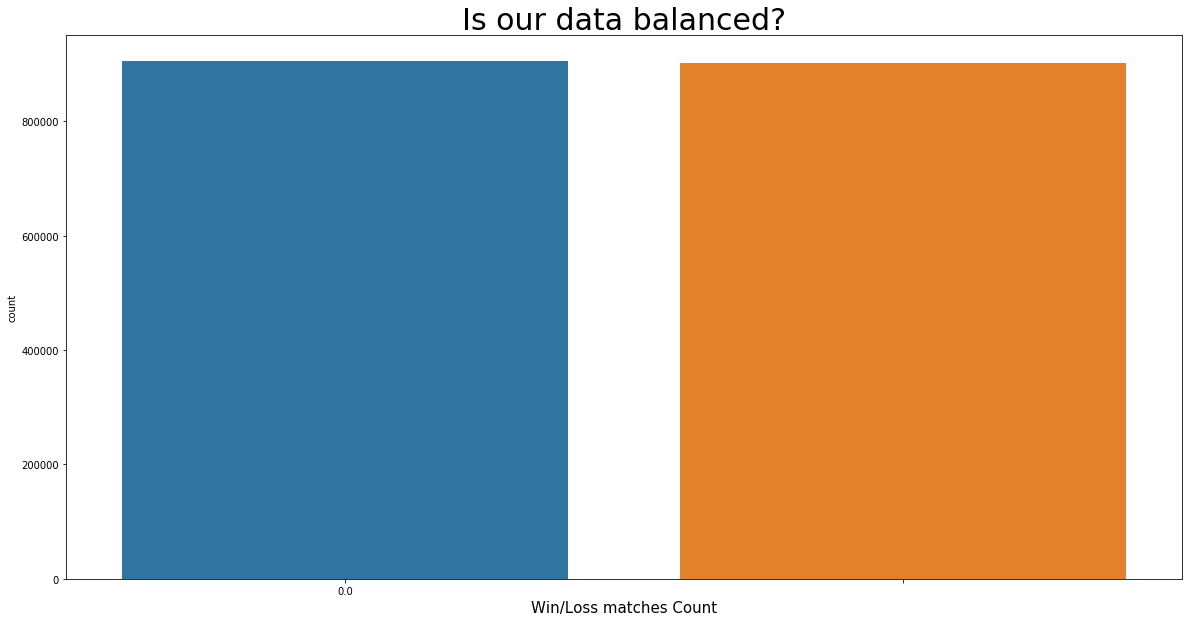

In [97]:
plt.figure(figsize=(20,10))
plot = sns.countplot(players['win'])
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Is our data balanced?",fontsize=30)
plot.set_xlabel("Win/Loss matches Count",fontsize=15)
plot.tick_params(labelsize=10)
plt.show()

Yep... it is! 
- That is a good sign for modelling, because we do not have to do any kind of undersampling

### Individual Player Data

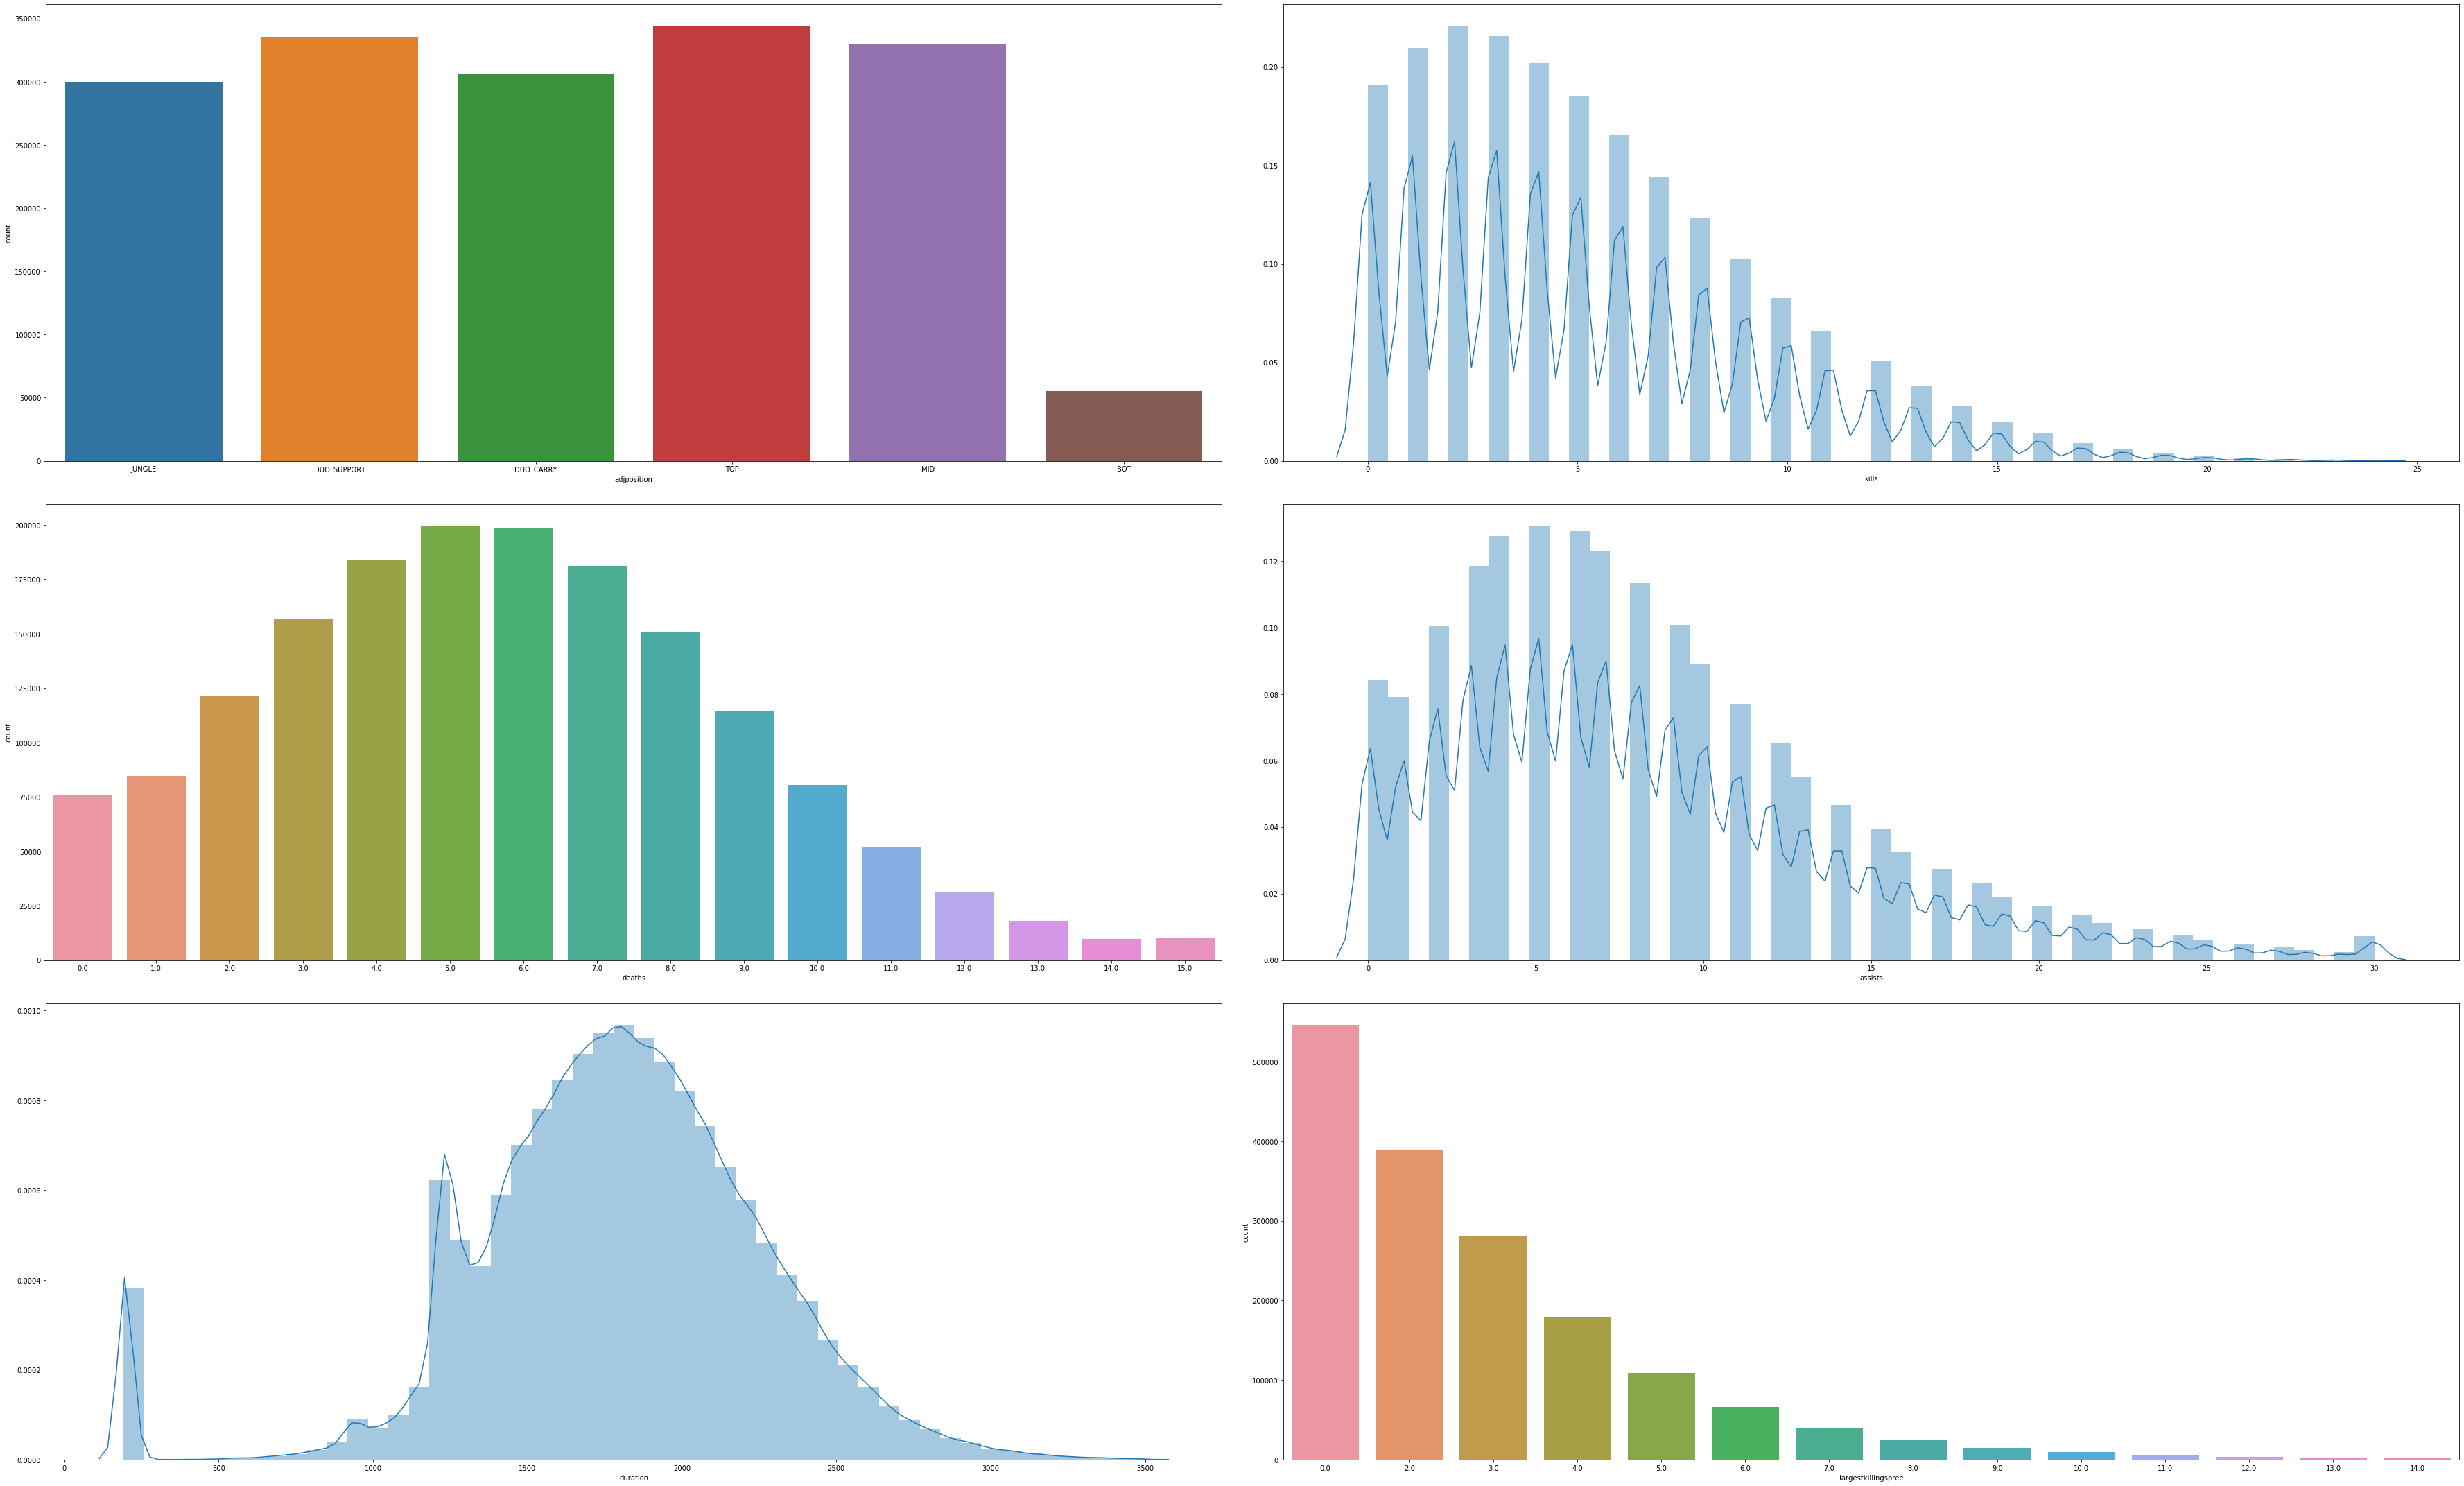

In [103]:
# Let's take a look at the distribution of the most important variables
fig = plt.figure(figsize=(50,200))

cols = ('adjposition',
        'kills',
        'deaths',
        'assists',
        'duration',
        'largestkillingspree')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

As we can see we have some outliers here:
   - 0 in duration means that match was cancelled - we have to delete that records
   - we will also trim outliers:
       - largestkillingspree: lower than 15
       - kills: lower than 25
       - duration: lower than 3500 and higher than 0

In [102]:
players = players.query("duration<3500 and duration>0")
players = players.query("largestkillingspree<15")
players = players.query("kills<25")

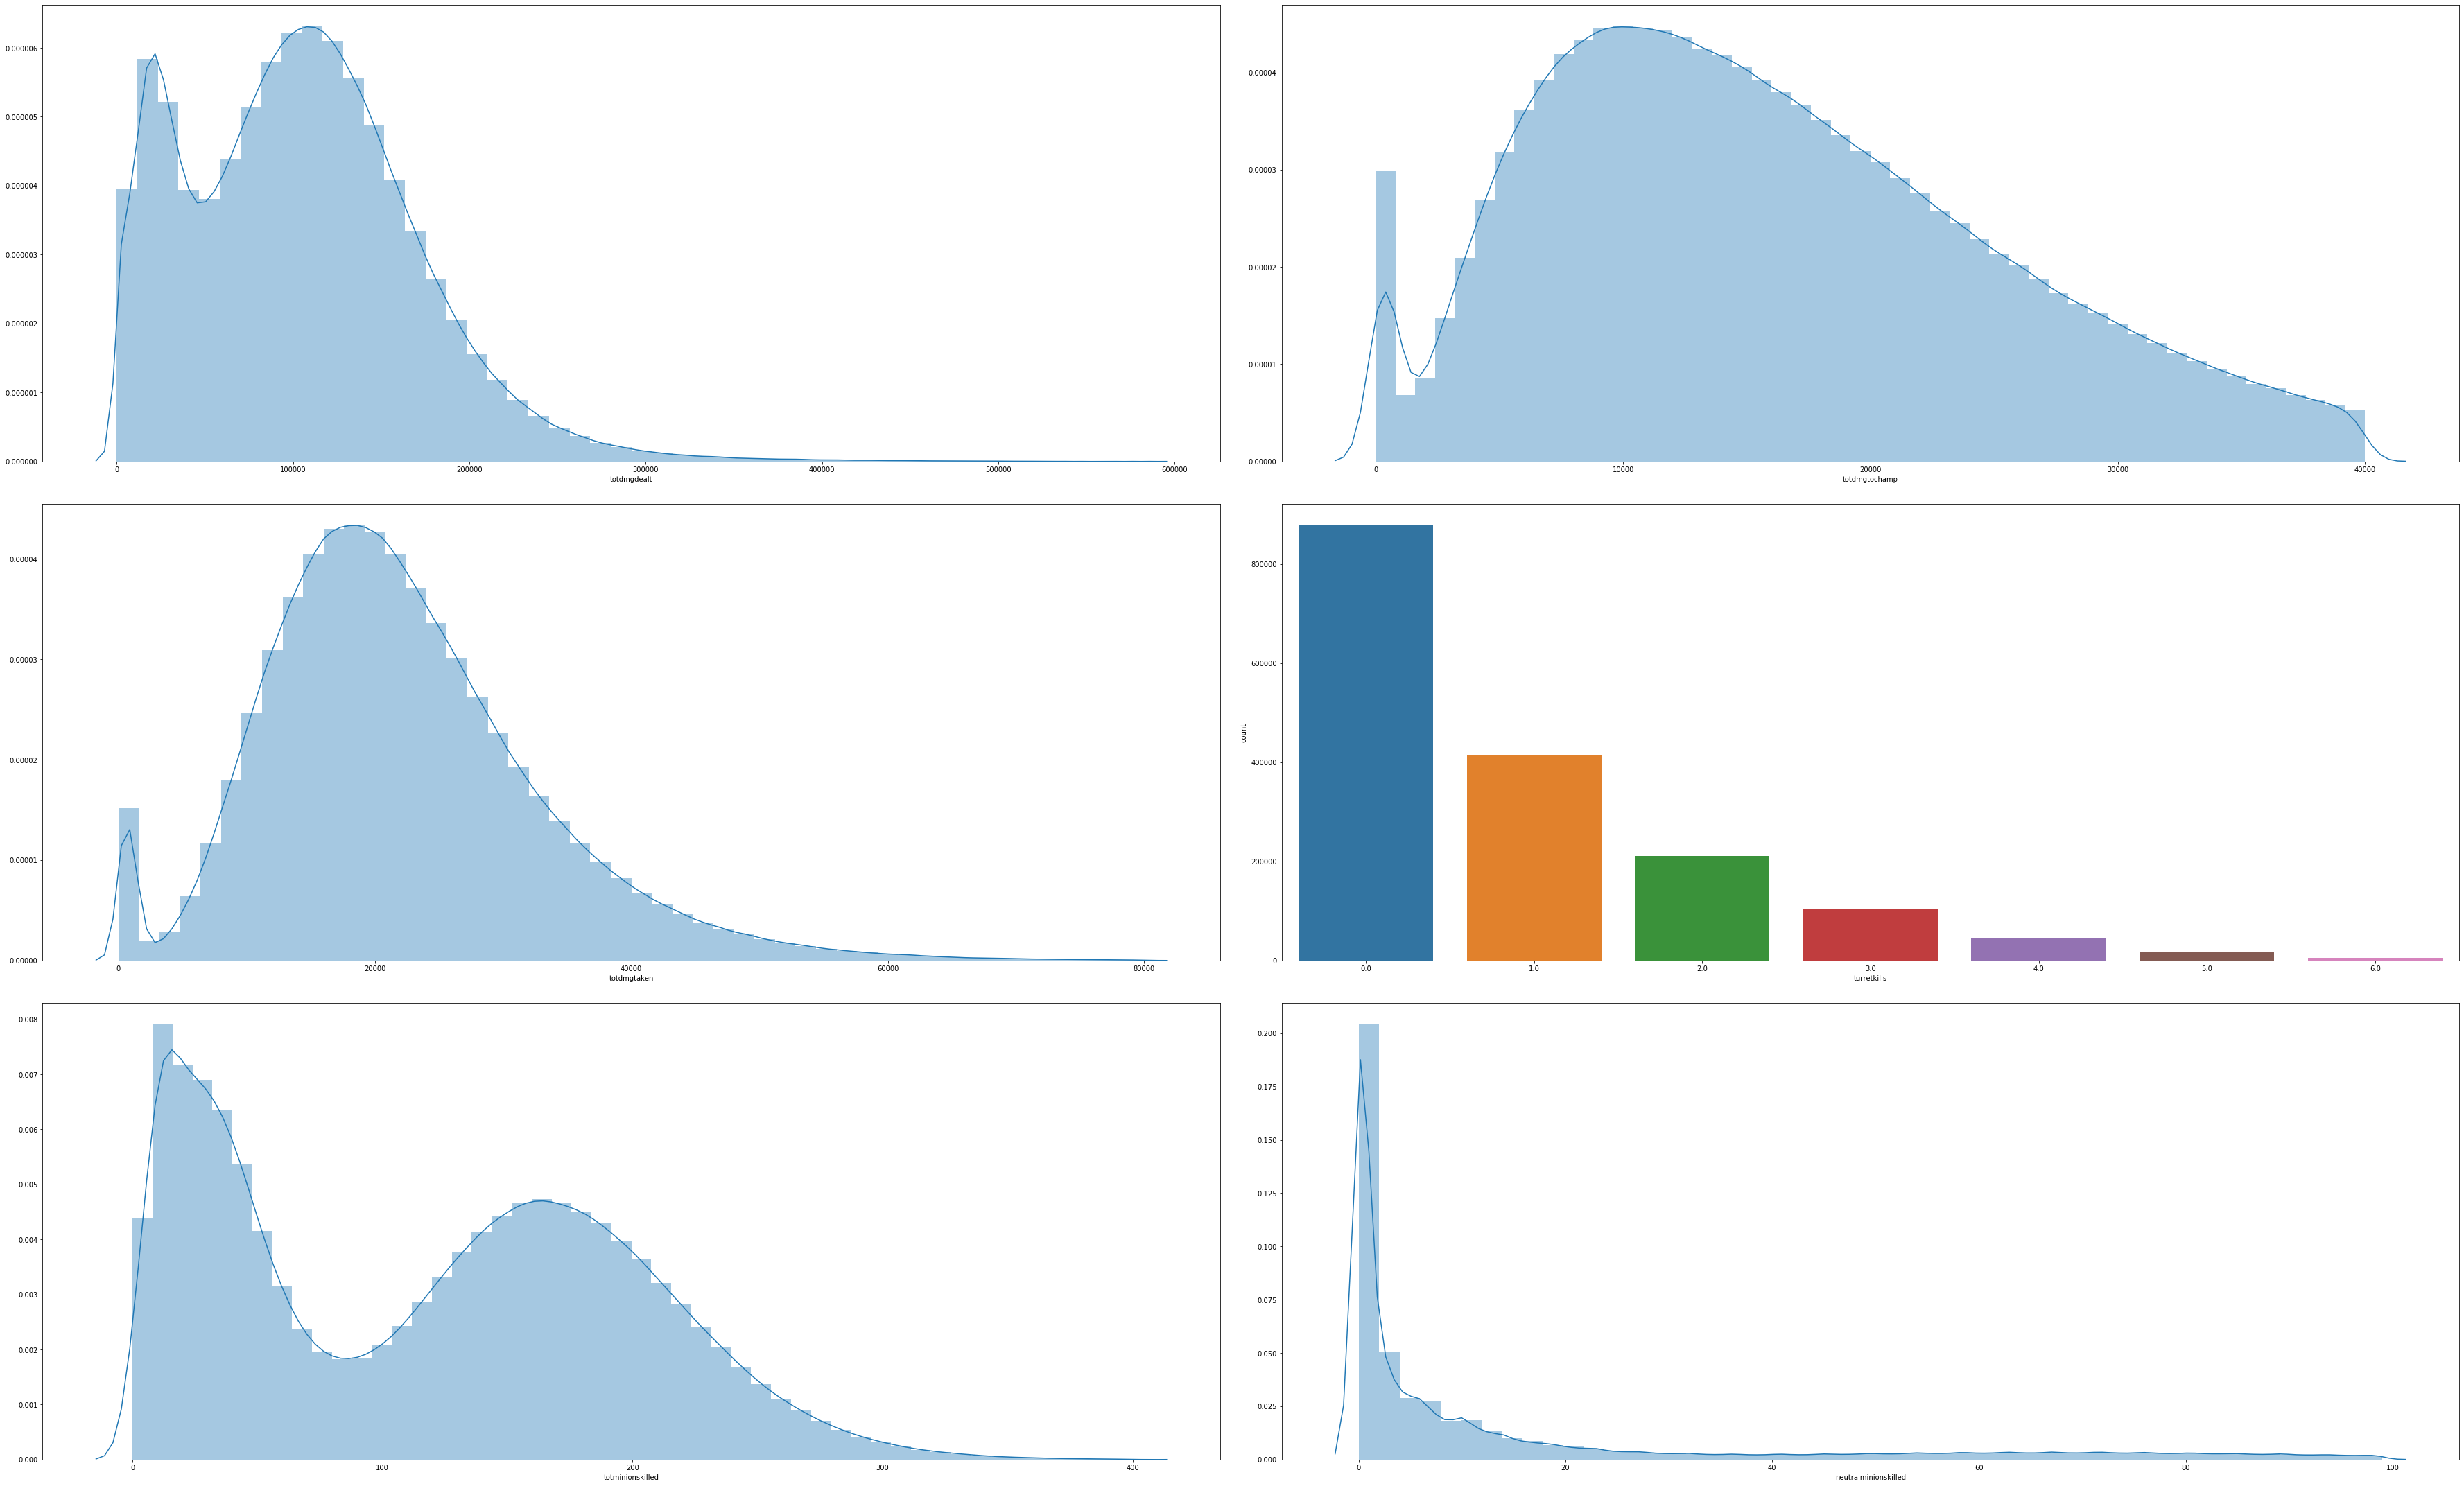

In [101]:
fig = plt.figure(figsize=(50,200))

cols = ('totdmgdealt',
        'totdmgtochamp',
        'totdmgtaken',
        'turretkills',
        'totminionskilled',
        'neutralminionskilled')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

As we can see we have again some outliers here:
   - total damage dealt are pretty high numbers, thats why the chart looks like this..
   - we will also trim outliers:
       - totdmgdealt: higher than 0 (we trim afk players) and lower than 400000
       - totdmgtochamp: lower than 60000
       - totdmgtaken: lower than 80000 and higher than 0 (we trim afk players)
       - turretkills: lower than 7
       - totminionskilled: lower than 400
       - neutralminionskilled: lower than 100

In [100]:
players = players.query("totdmgdealt>0 and totdmgdealt<400000")
players = players.query("totdmgtochamp<60000")
players = players.query("totdmgtaken<80000 and totdmgtaken>0")
players = players.query("turretkills<7")
players = players.query("totminionskilled<400")
players = players.query("neutralminionskilled<100")

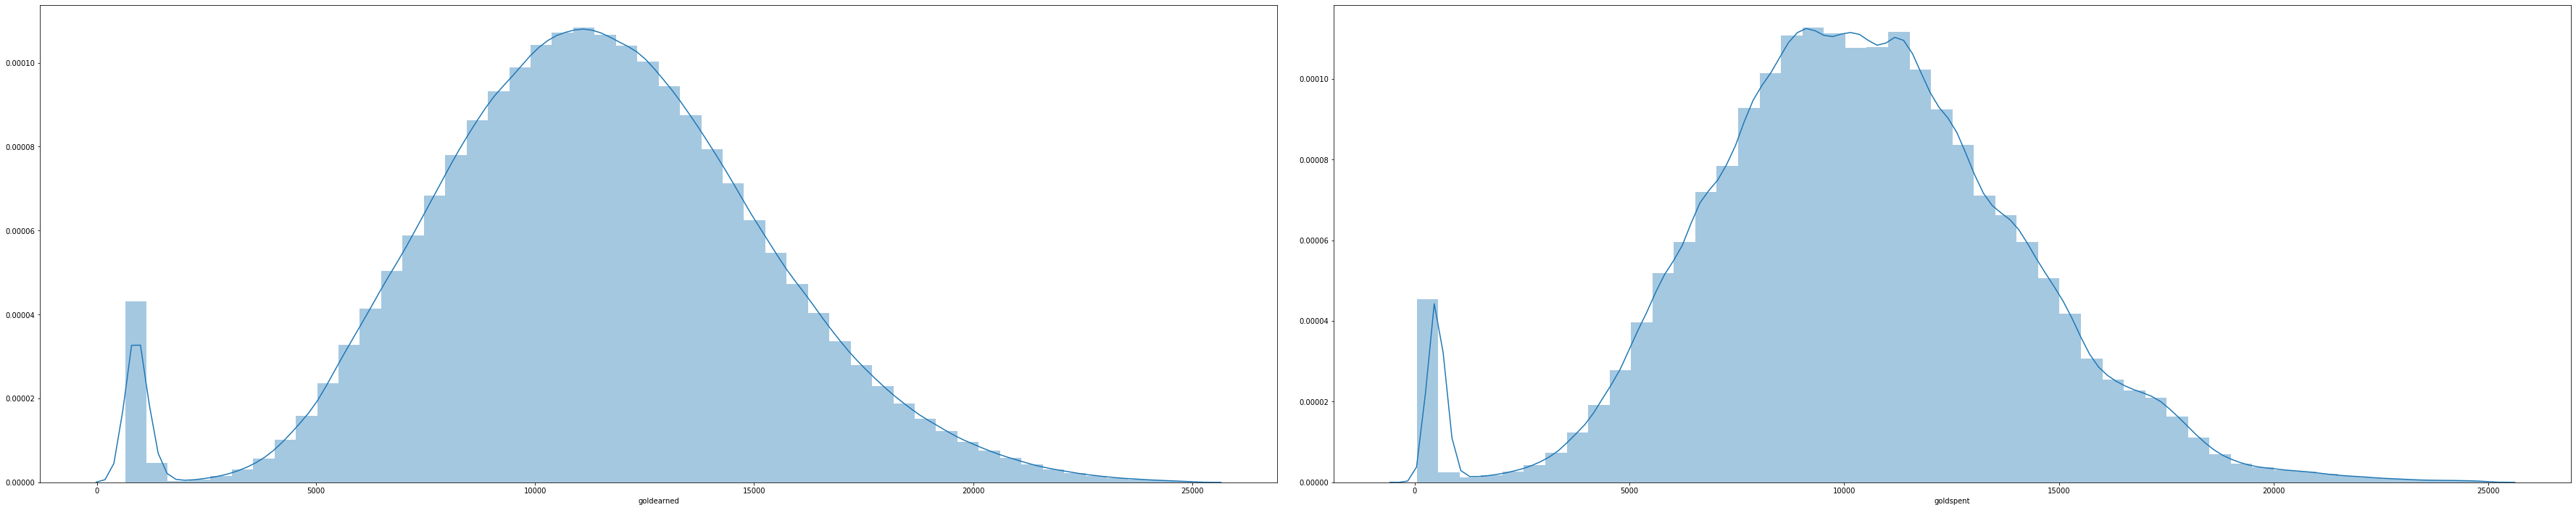

In [91]:
fig = plt.figure(figsize=(50,200))

cols = ('goldearned',
        'goldspent')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

Again we have to drop afk players!

In [57]:
players = players.query("goldearned>0 and goldearned<25000")
players = players.query("goldspent>0 and goldspent<25000")

In [ ]:
fig = plt.figure(figsize=(16,120))

cols = ('champlvl',
        'champ_chosen')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

### Team Data

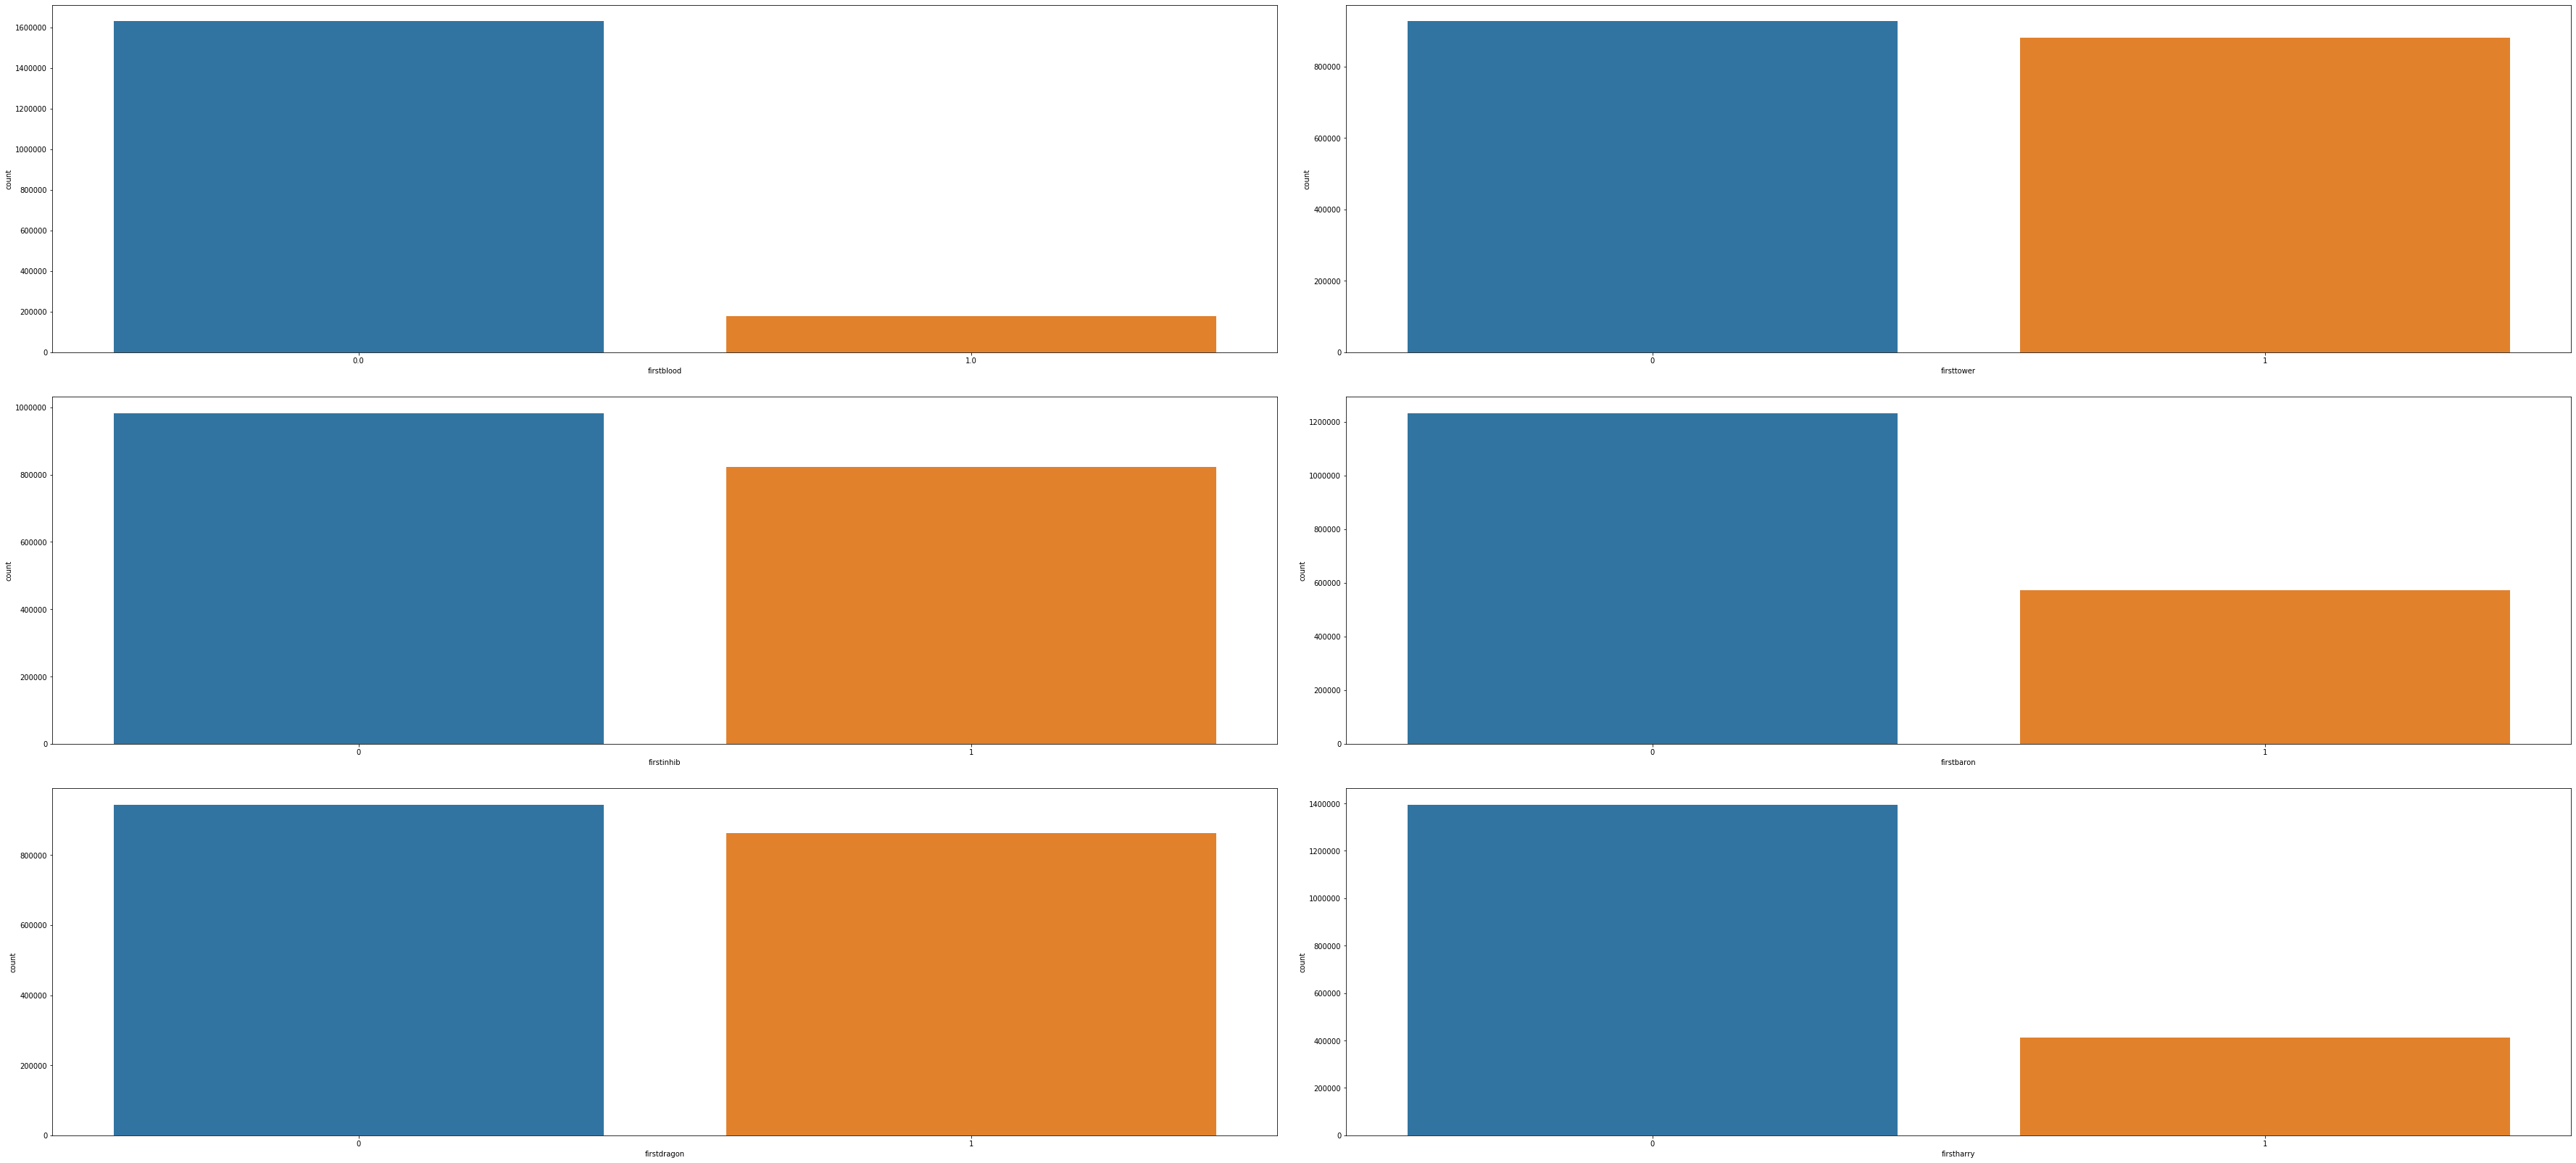

In [83]:
fig = plt.figure(figsize=(50,200))

cols = ('firstblood',
        'firsttower',
        'firstinhib',
        'firstbaron',
        'firstdragon',
        'firstharry')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

- Our data here in terms of firstblood and firsttower should be balanced, because in-game there is always a team which does this first - It would be a great problem if our aim was to predict outcome of the match per team
- However, as our analysis is per player, we dont mind and we can leave it as it is

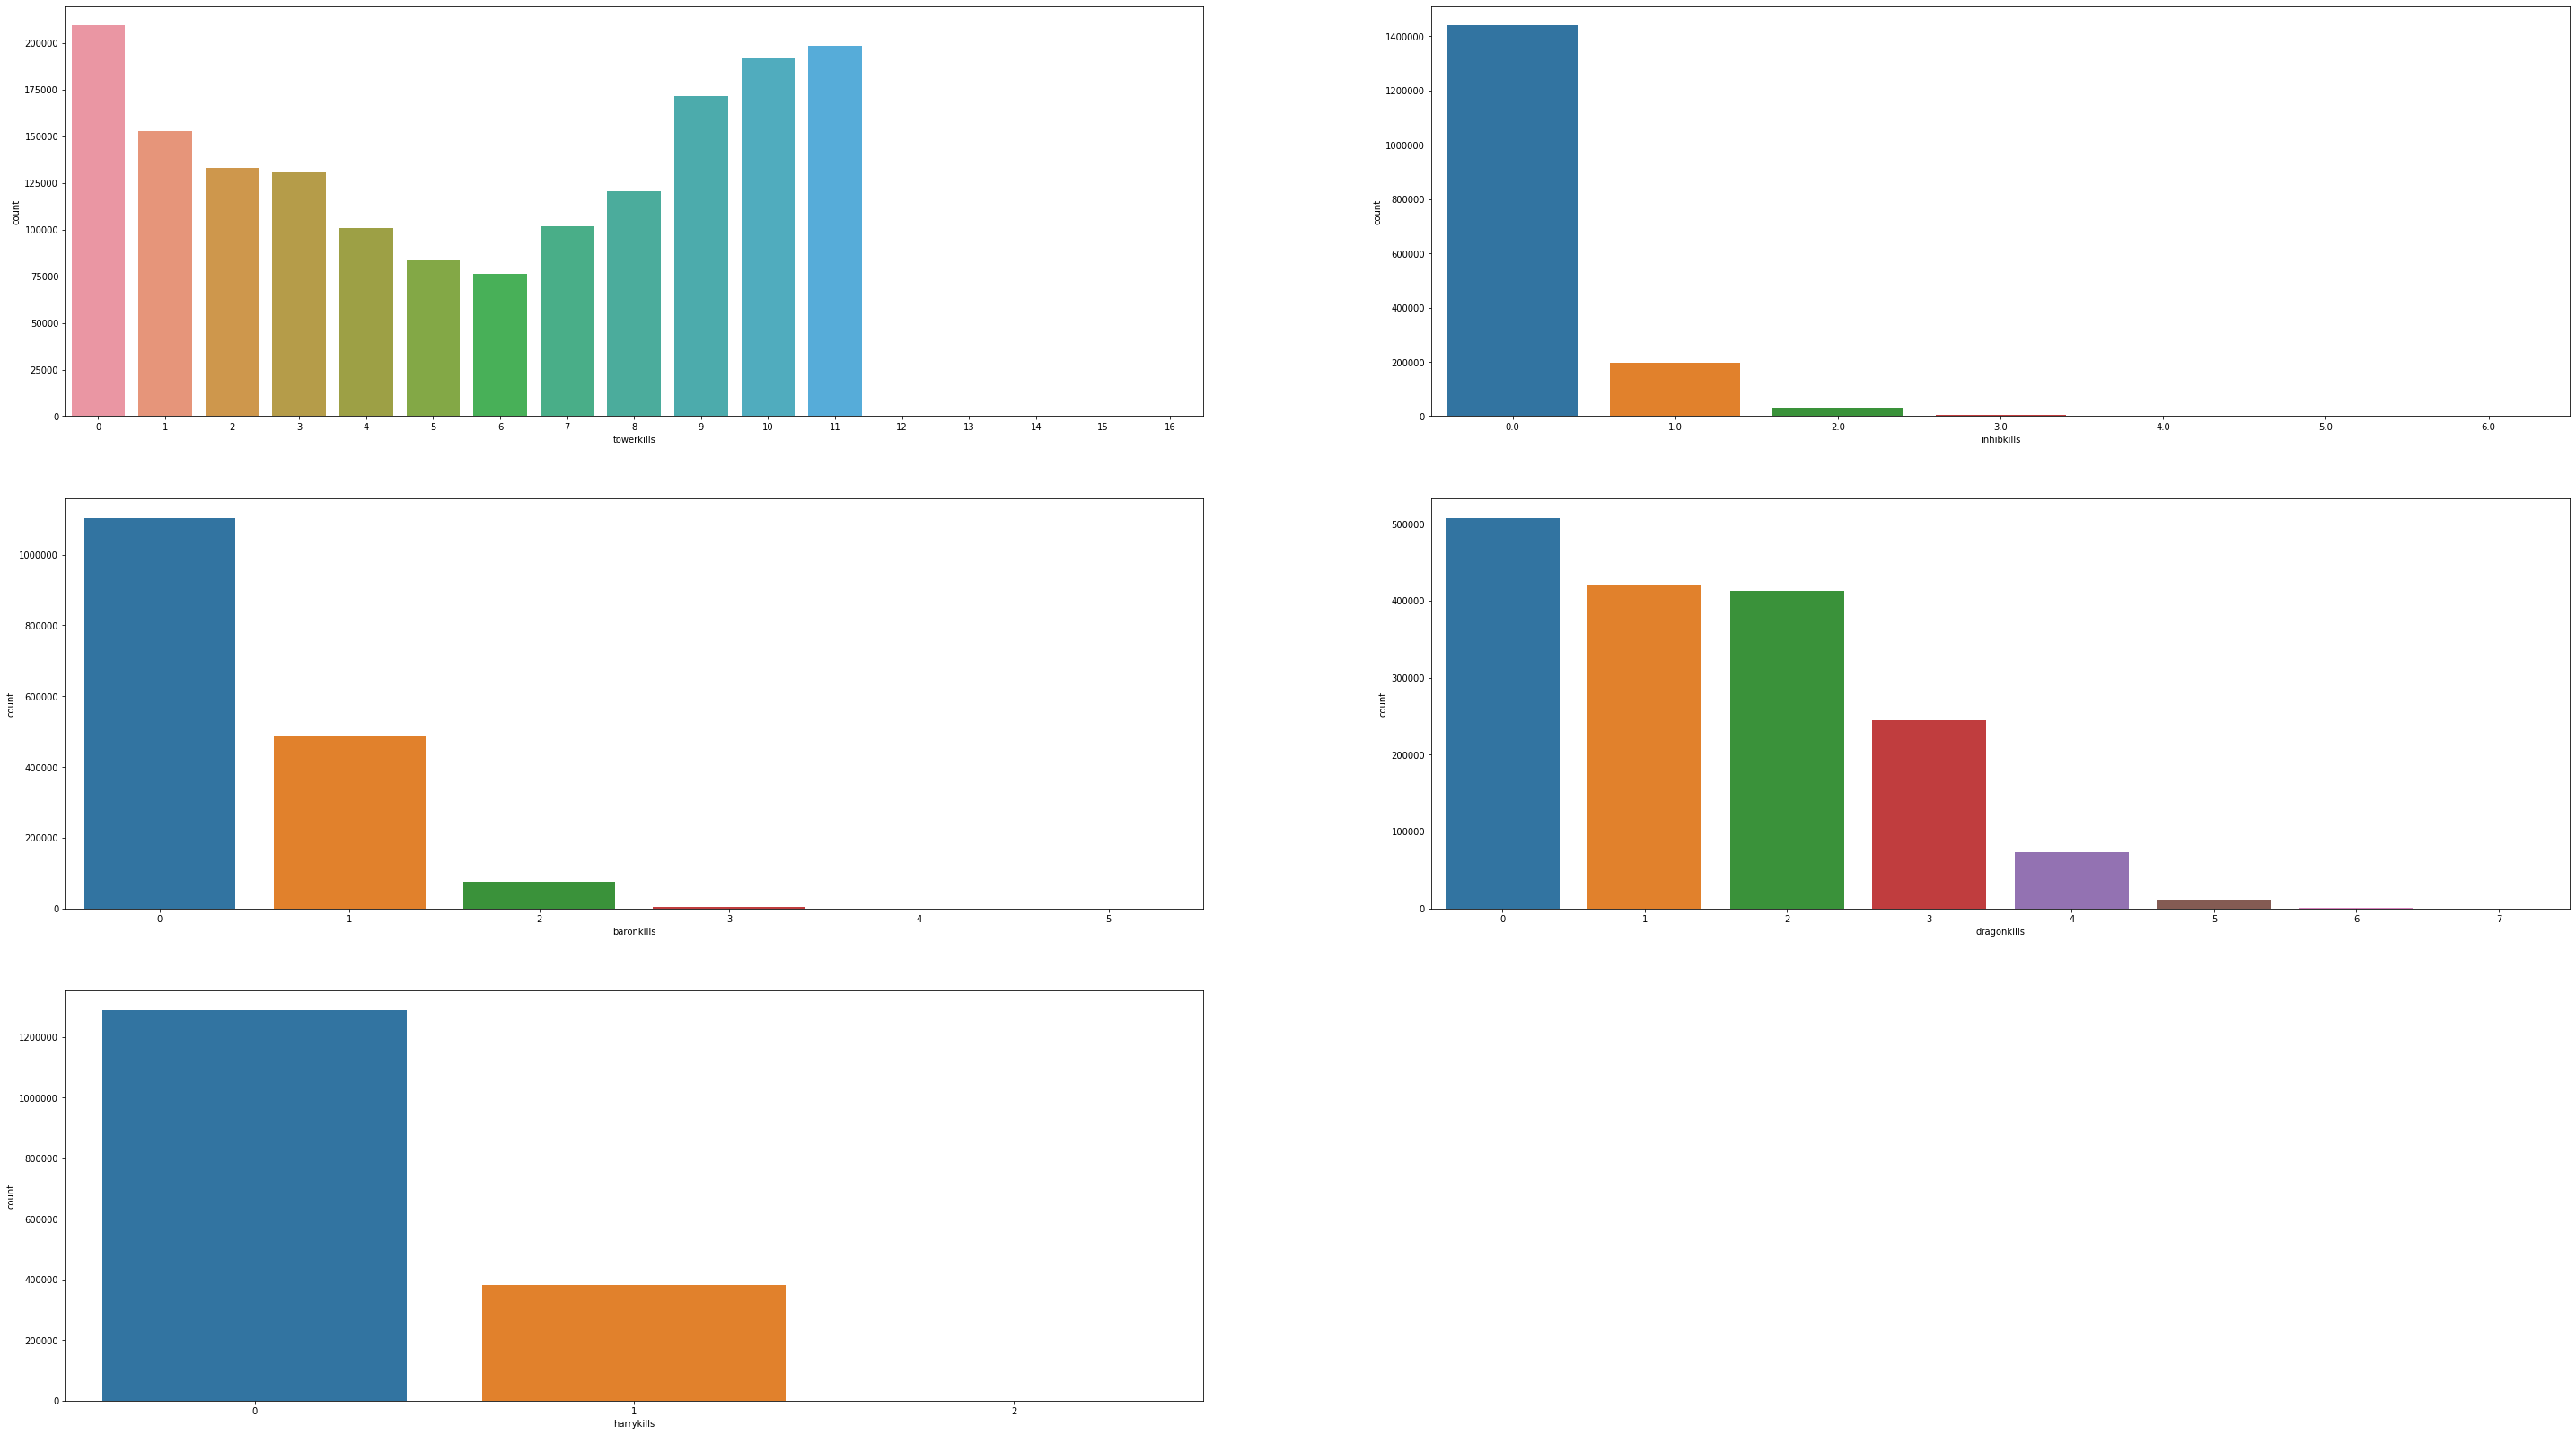

In [108]:
fig = plt.figure(figsize=(50,200))

cols = ('towerkills',
        'inhibkills',
        'baronkills',
        'dragonkills',
        'harrykills')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

And our final outliers to clear:
   - harrykills: less than 2
   - dragonkills: less than 6
   - baronkills: less than 4
   - inhibkills: less than 4
   - towerkills: less than 12

In [109]:
players = players.query("harrykills<2")
players = players.query("dragonkills<6")
players = players.query("baronkills<4")
players = players.query("inhibkills<4")
players = players.query("towerkills<12")

## Investigating Correlations among variables

- Here we will investigate correlation among our variables

Text(0.5, 1, 'Correlations - win vs factors (all games)')

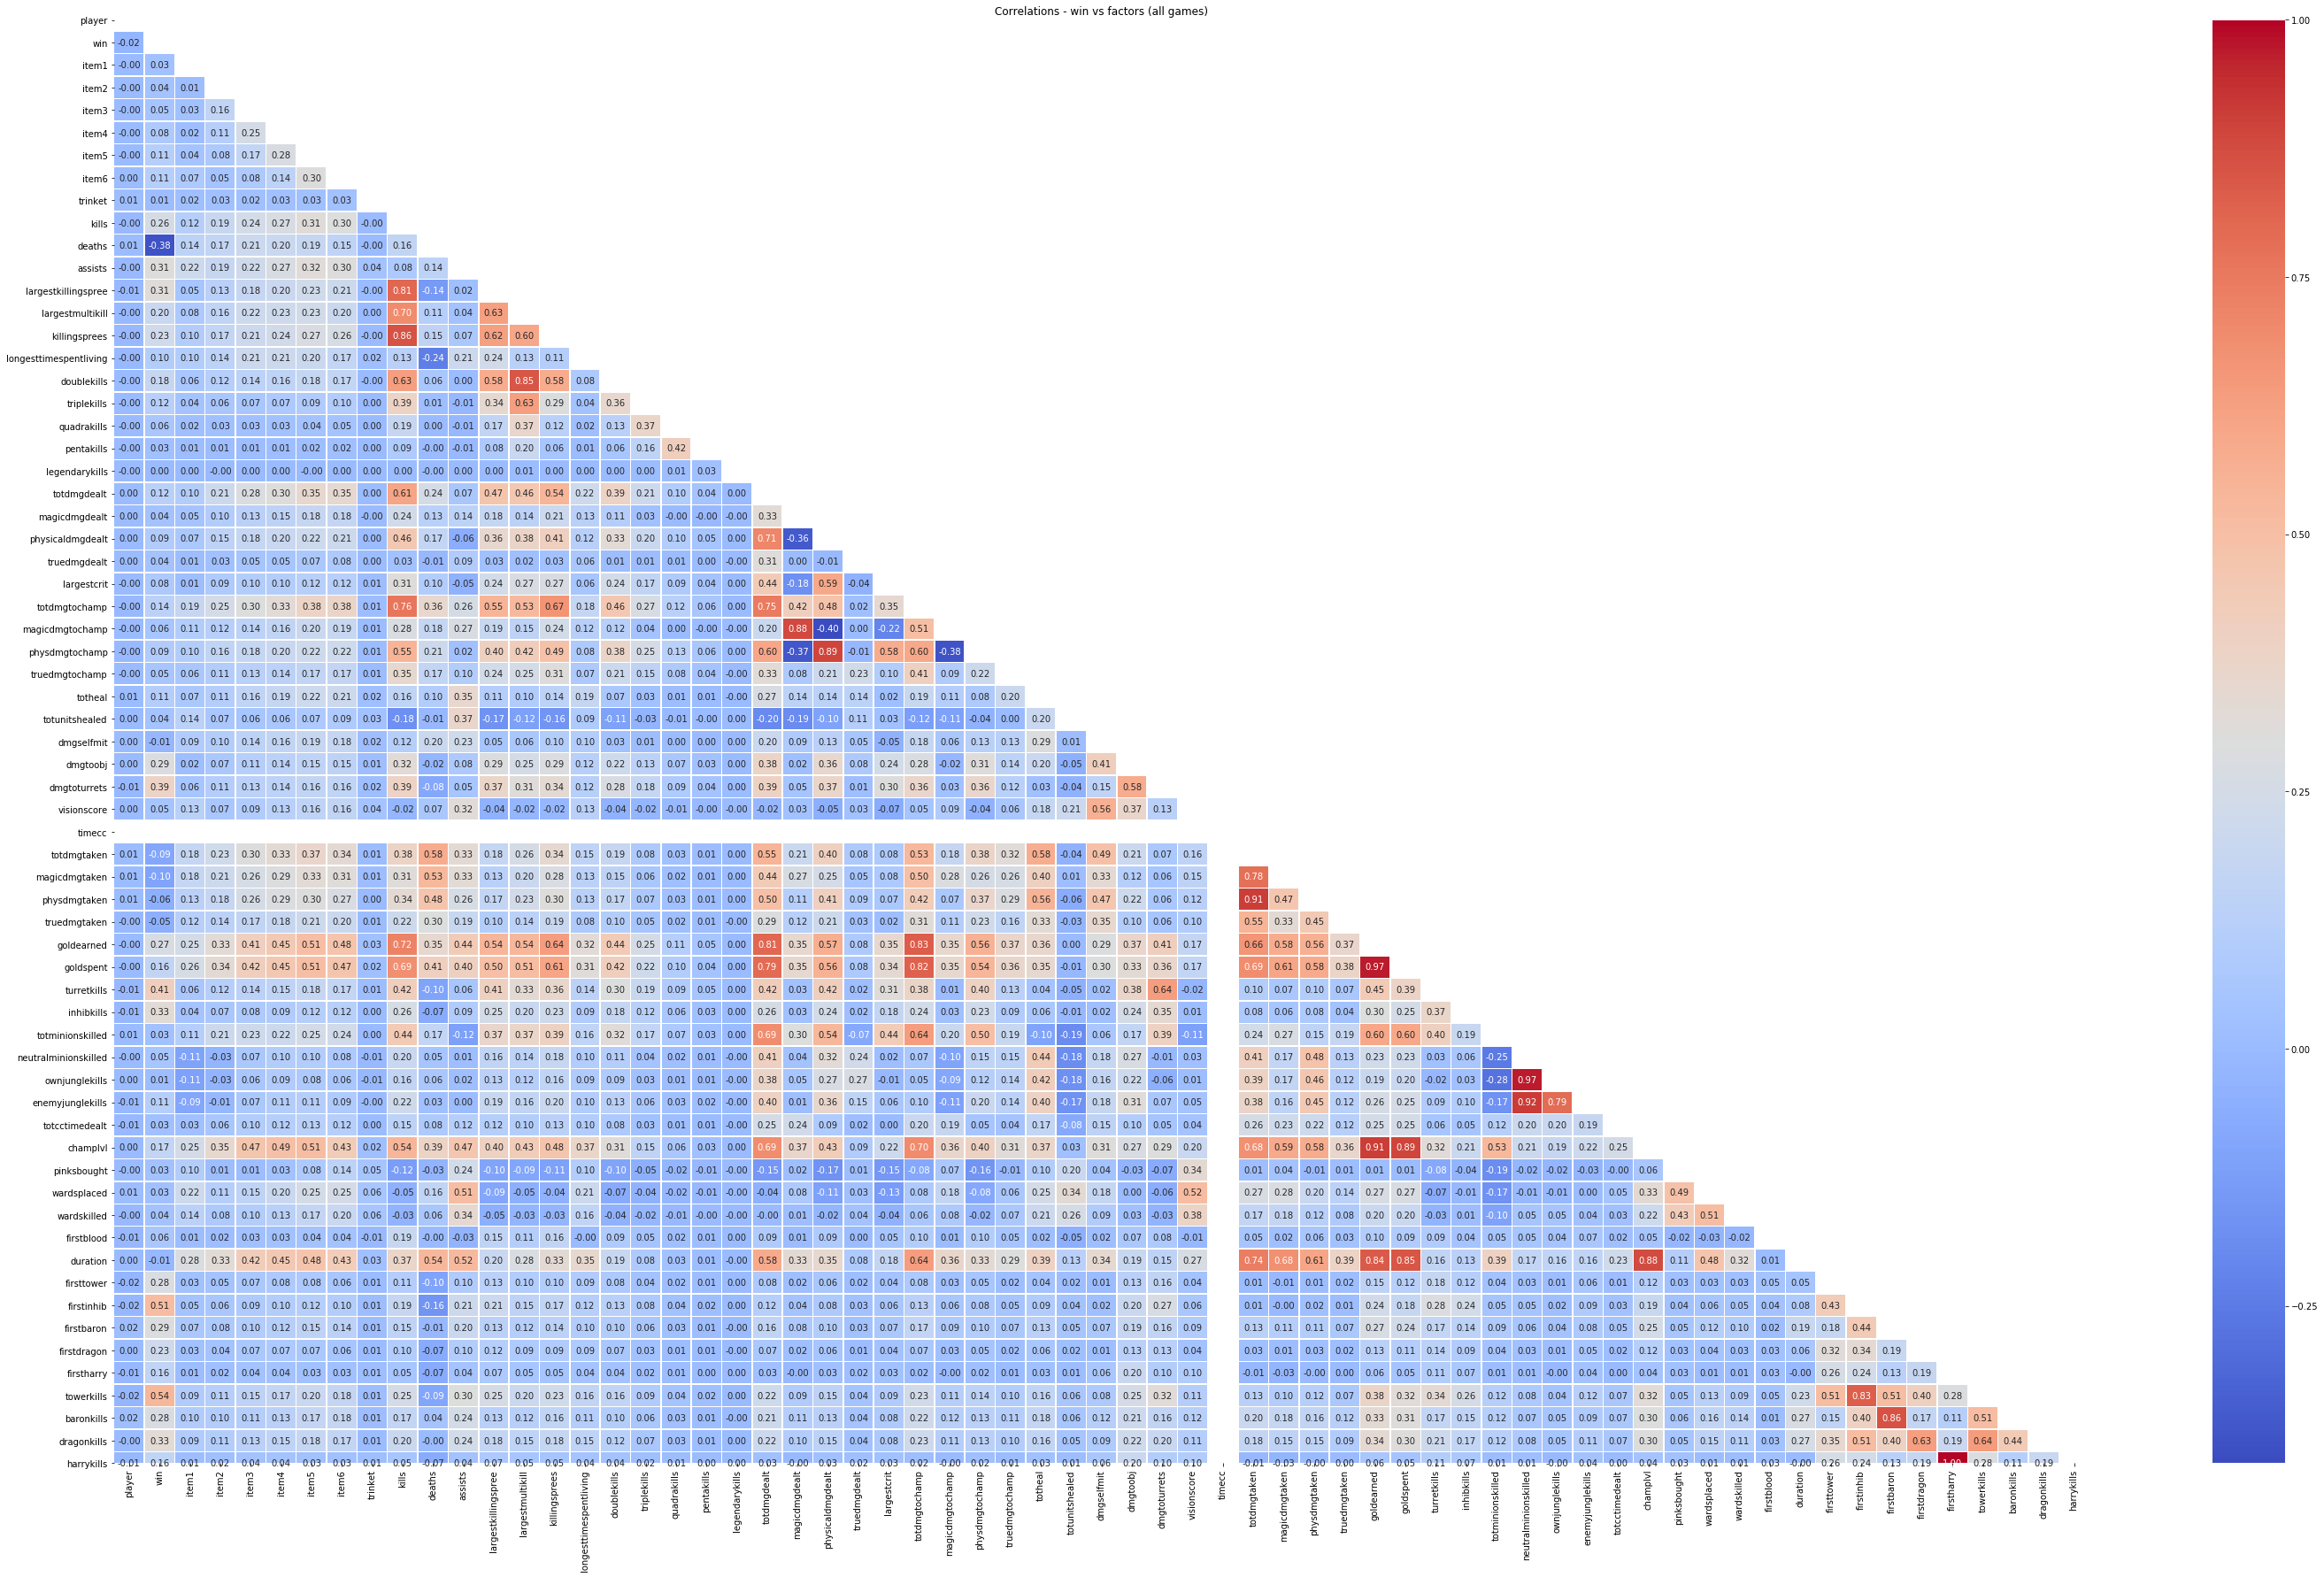

In [74]:
df_corr = players._get_numeric_data()

m = np.zeros_like(df_corr.corr(), dtype=np.bool)
m[np.triu_indices_from(m)] = True

plt.figure(figsize=(50,30))
sns.heatmap(df_corr.corr(), cmap = 'coolwarm', annot= True, fmt = '.2f',
            linewidths=.5, mask = m)

plt.title('Correlations - win vs factors (all games)')

In [104]:
correlationValues = players.corr()

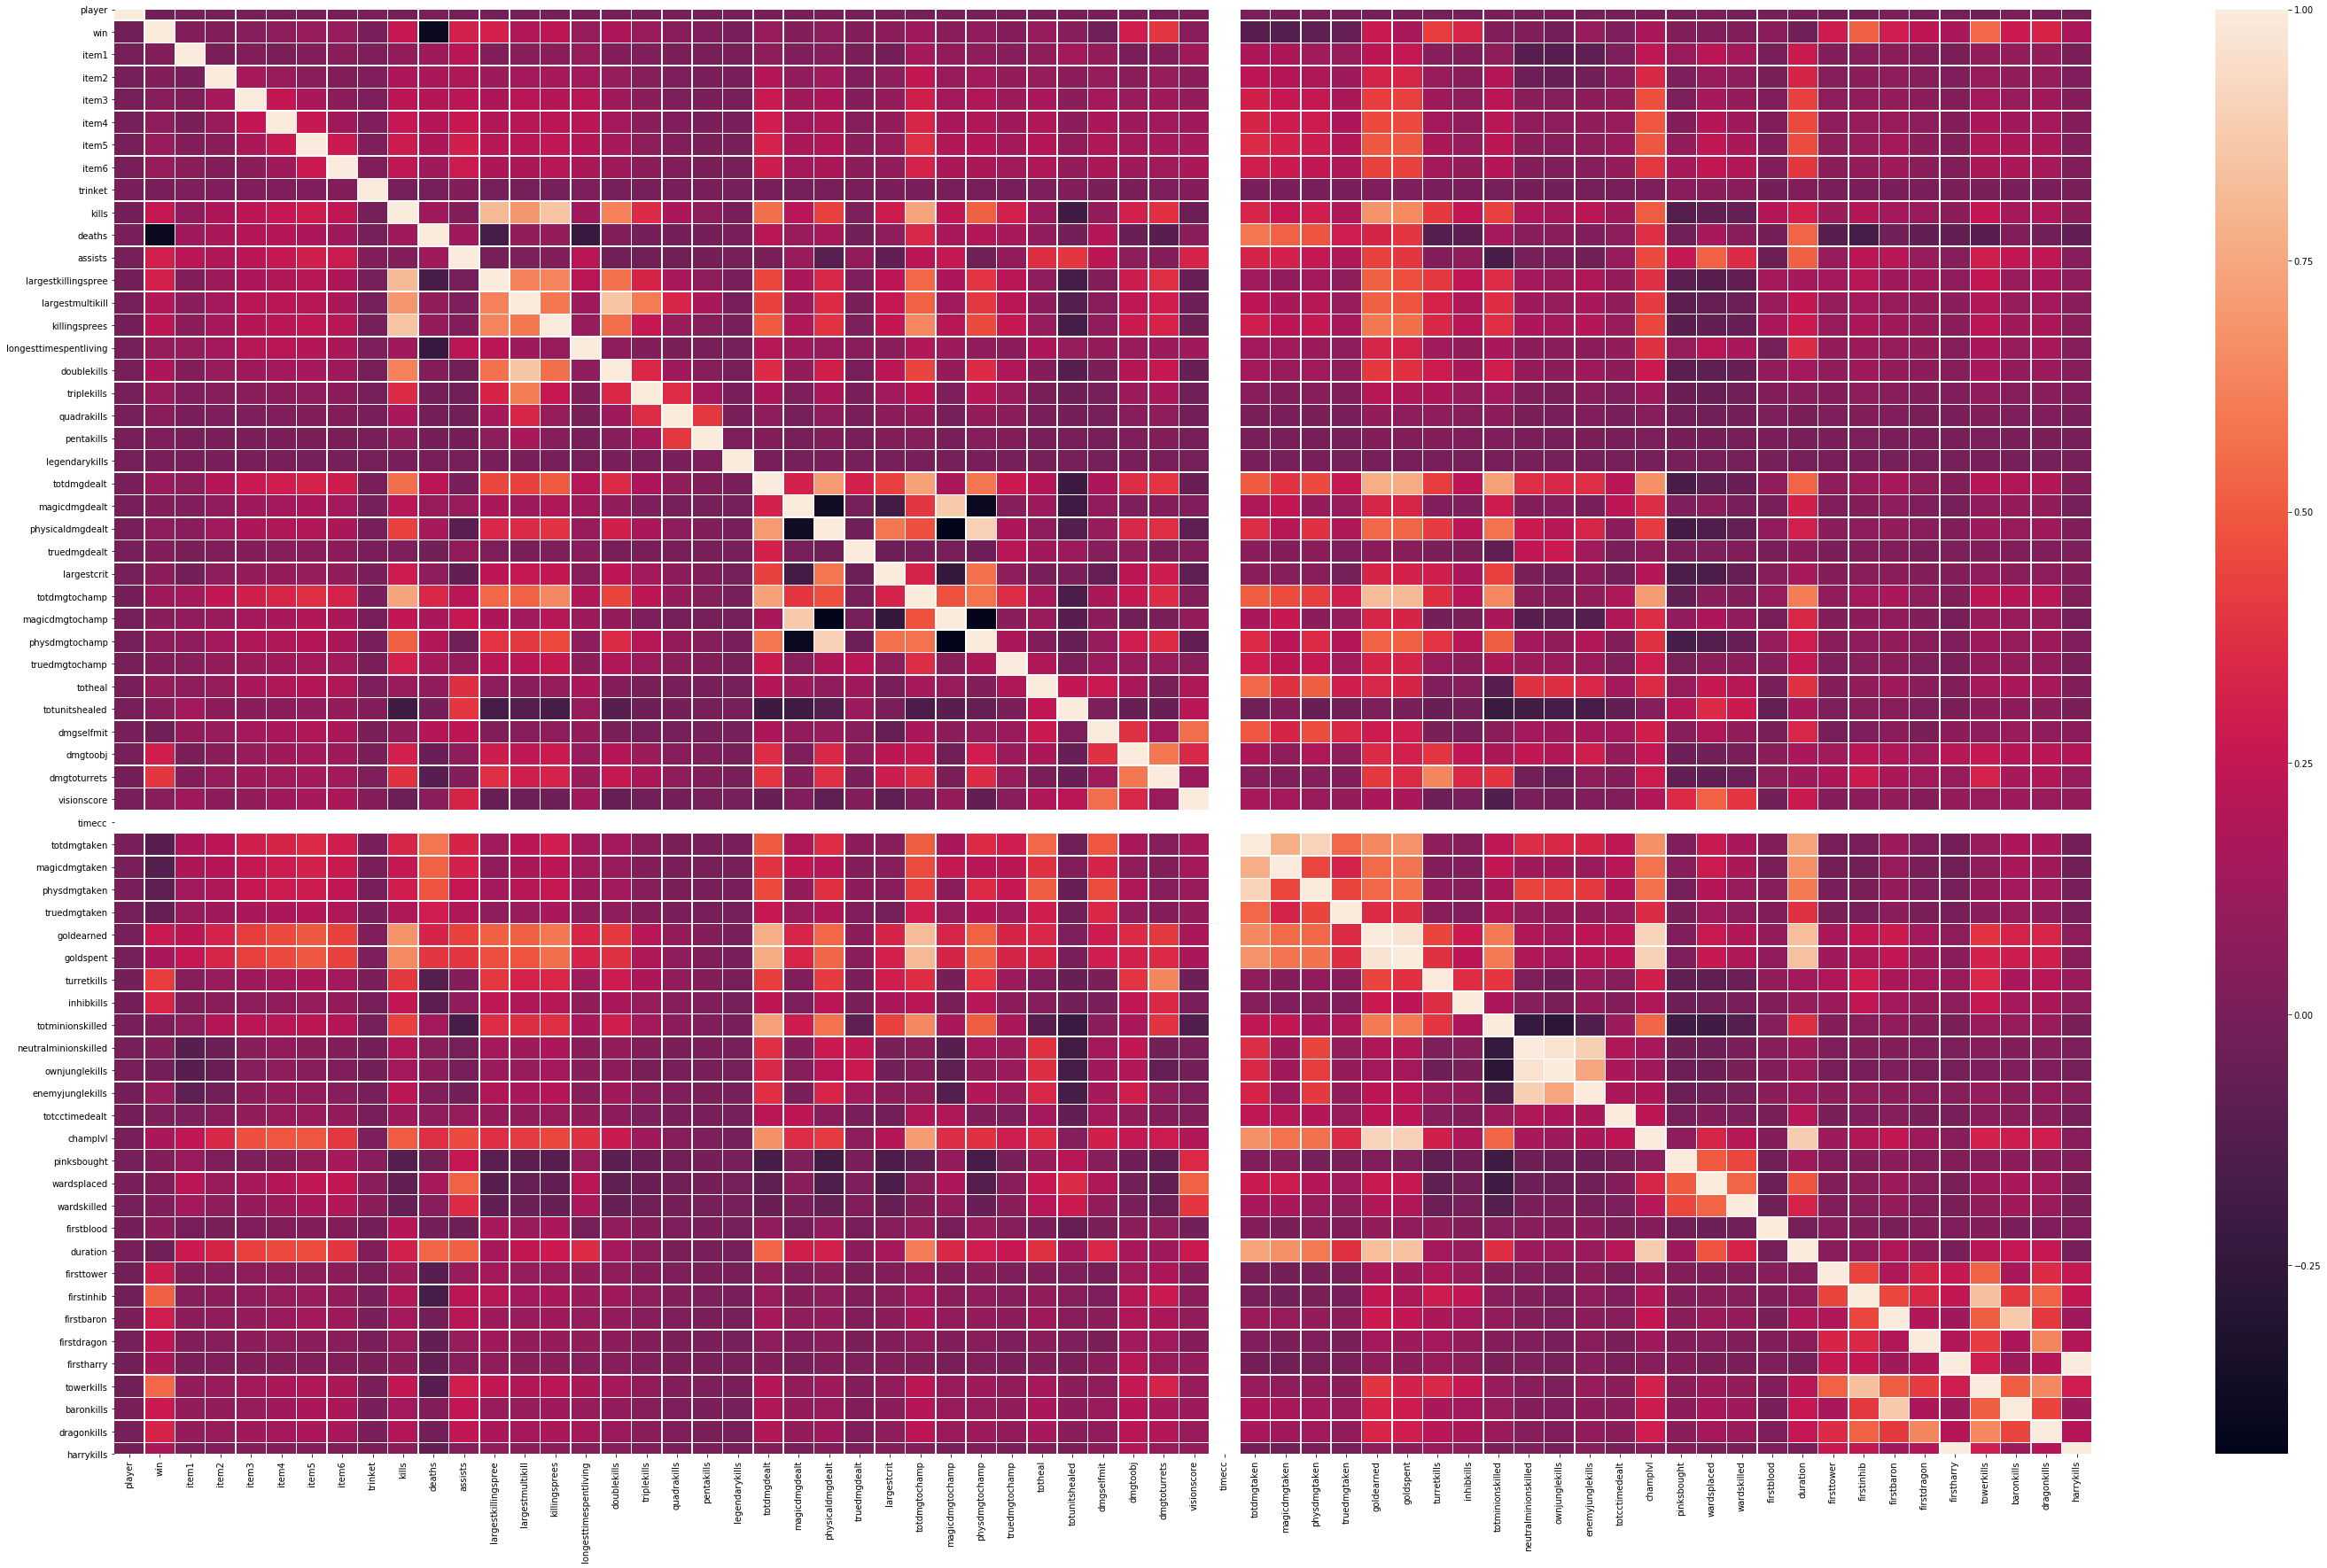

In [107]:
f,ax = plt.subplots(figsize=(50, 30))
sns.heatmap(pd.DataFrame(correlationValues), linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Model Estimation

In this part we will try to estimate our models: XGBoost, NeuralNetworks.

What we've done here:

- Feature selection to fit our model best
- Hyperparameters tunning
- Base our conclusions on Precision and Recall in addition to Accuracy
- Time Efficiency testing for each algorithm

Lets begin!

![](https://cdn.lynda.com/course/645050/645050-636700308369503992-16x9.jpg)